In [2]:
import pandas as pd 
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
conn = sqlite3.connect('twitch.db')

In [4]:
sql = """
SELECT *
FROM Twitch_Directory
"""
# Read the sql query into pandas to view the results
twitch_data = pd.read_sql_query(sql, conn)
twitch_data.head()

,index,Date,Time,Directory Name,Viewer Count
0,0,2022-01-31,10:45:52,Just Chatting,390431
1,1,2022-01-31,10:45:52,Grand Theft Auto V,239160
2,2,2022-01-31,10:45:52,League of Legends,219827
3,3,2022-01-31,10:45:52,VALORANT,137060
4,4,2022-01-31,10:45:52,Fortnite,115131


C:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


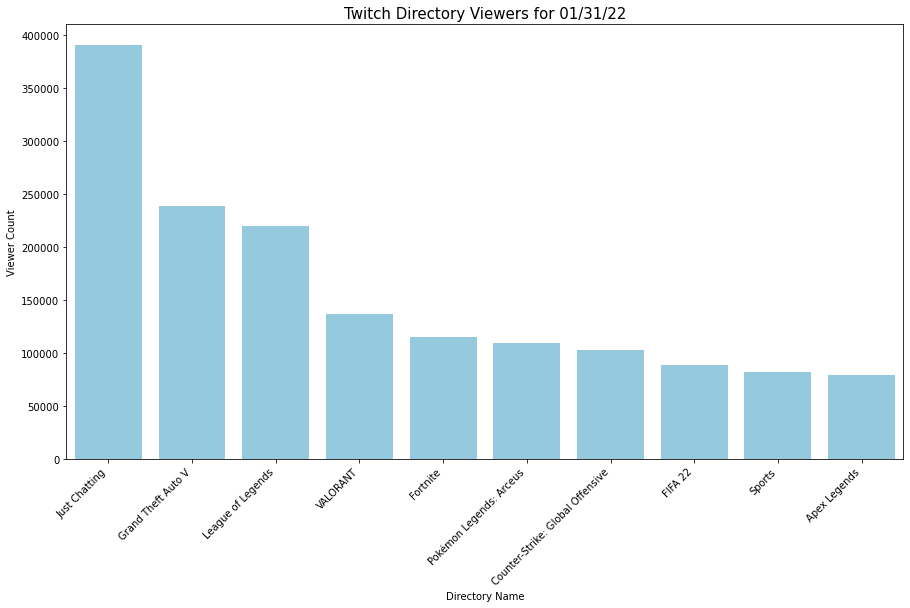

In [6]:
plt.figure(figsize=(15,8))
sns.barplot(twitch_data['Directory Name'], twitch_data['Viewer Count'], color='skyblue')
plt.xticks(rotation=45,ha='right')
plt.title('Twitch Directory Viewers for 01/31/22', fontsize=15)
plt.show()